In [1]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Study data files
path = "../Jennifer's_work/Clean_CSV.csv"

# Read data and the study results
data = pd.read_csv(path)
data.head() 

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Cindy's Work: Analysis over Age and Time Spent

In [3]:
# Calculate what the average overall usage time is 
cd_overall_avg_time = data['Daily_Usage_Time (minutes)'].mean()
cd_overall_avg_time

96.30952380952381

y = 0.81x + 74.13


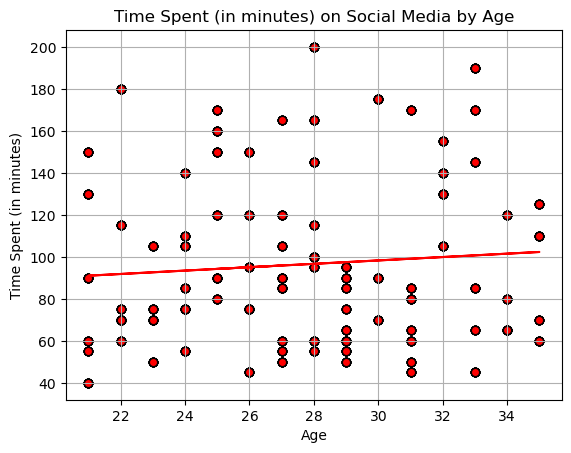

In [4]:
#Create a scatter chart to display time spent on social media by age
cd_x = data['Age']
cd_y = data['Daily_Usage_Time (minutes)']
plt.scatter(cd_x,cd_y,color='red',marker= 'o',edgecolors='black')
plt.xlabel('Age')
plt.ylabel('Time Spent (in minutes)')
plt.title('Time Spent (in minutes) on Social Media by Age')
#Generate a regression analysis and plot the best fit line for the graph
(cd_slope,cd_intercept,cd_rvalue,cd_pvalue,std) = linregress(cd_x,cd_y)
cd_regress_values = cd_x * cd_slope + cd_intercept
cd_line_eq = "y = " + str(round(cd_slope,2)) + "x + " + str(round(cd_intercept,2))
print(cd_line_eq)
plt.plot(cd_x,cd_regress_values,'r-')
plt.annotate(cd_line_eq,(0,0),fontsize=15,color="red")
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/age_time_scatter.png")

In [5]:
#Run a correlation on age and time spent using pearson r
cd_correlation = st.pearsonr(cd_x,cd_y)
cd_correlation

PearsonRResult(statistic=0.08103752169850877, pvalue=0.013737831278319346)

The average age Daily Time Spent on social media is: 96.30952380952381
The most middle amount of time users spend: 85.0
The most common amount of time users spend: 0    60
1    70
2    75
3    90
Name: Daily_Usage_Time (minutes), dtype: int64
The least amount of time spent: 40
The most amount of time spent: 200
39.22827429289166
1538.8575039983446
The lower quartile of Time Spent is: 65.0
The upper quartile of Time Spent is: 120.0
The interquartile range of Time Spent is: 55.0
The median of Time Spent is: 85.0 
Time Spent below -17.5 could be outliers.
Time Spent above 202.5 could be outliers.


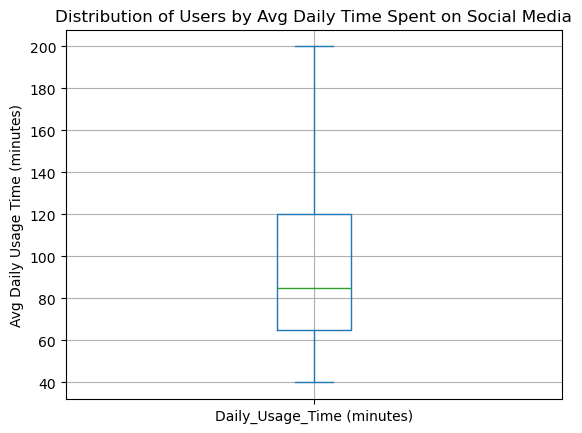

In [8]:
#Create a box plot showing the distribution of the users by average time on social media
data['Daily_Usage_Time (minutes)'].plot(kind='box')
plt.ylabel('Avg Daily Usage Time (minutes)')
plt.title('Distribution of Users by Avg Daily Time Spent on Social Media')
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/time_box.png")
#Generate summary statistics of the age distribution
cd_time_mean = data['Daily_Usage_Time (minutes)'].mean()
cd_time_median = data['Daily_Usage_Time (minutes)'].median()
cd_time_mode = data['Daily_Usage_Time (minutes)'].mode()
cd_time_min = data['Daily_Usage_Time (minutes)'].min()
cd_time_max = data['Daily_Usage_Time (minutes)'].max()
cd_time_var = data['Daily_Usage_Time (minutes)'].var()
cd_time_std = data['Daily_Usage_Time (minutes)'].std()

print(f'The average age Daily Time Spent on social media is: {cd_time_mean}')
print(f'The most middle amount of time users spend: {cd_time_median}')
print(f'The most common amount of time users spend: {cd_time_mode}')
print(f"The least amount of time spent: {cd_time_min}")
print(f"The most amount of time spent: {cd_time_max}")
print(cd_time_std)
print(cd_time_var)


cd_quartiles = data['Daily_Usage_Time (minutes)'].quantile([.25,.5,.75])
cd_lowerq = cd_quartiles[0.25]
cd_upperq = cd_quartiles[0.75]
cd_iqr = cd_upperq-cd_lowerq

print(f"The lower quartile of Time Spent is: {cd_lowerq}")
print(f"The upper quartile of Time Spent is: {cd_upperq}")
print(f"The interquartile range of Time Spent is: {cd_iqr}")
print(f"The median of Time Spent is: {cd_quartiles[0.5]} ")

cd_lower_bound = cd_lowerq - (1.5*cd_iqr)
cd_upper_bound = cd_upperq + (1.5*cd_iqr)
print(f"Time Spent below {cd_lower_bound} could be outliers.")
print(f"Time Spent above {cd_upper_bound} could be outliers.")

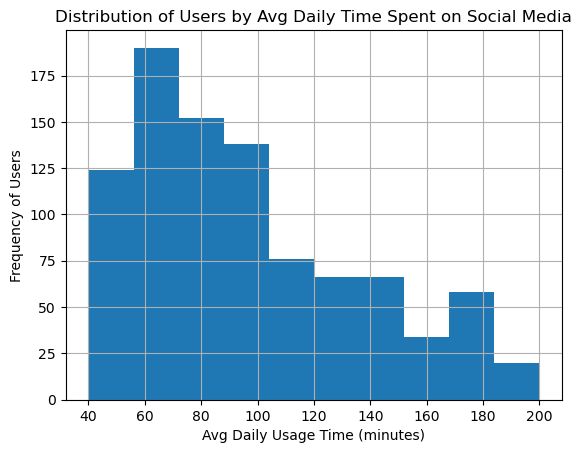

In [9]:
plt.hist(data['Daily_Usage_Time (minutes)'])
plt.xlabel('Avg Daily Usage Time (minutes)')
plt.ylabel('Frequency of Users')
plt.title('Distribution of Users by Avg Daily Time Spent on Social Media')
plt.grid(True)
plt.savefig("../Images/Exhibits-Cindy/time_histogram.png")

End of Cindy's work